In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
import statsmodels.formula.api as smf

In [93]:
A=pd.read_csv('Advertising-1.csv', index_col=0)

In [94]:
A.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


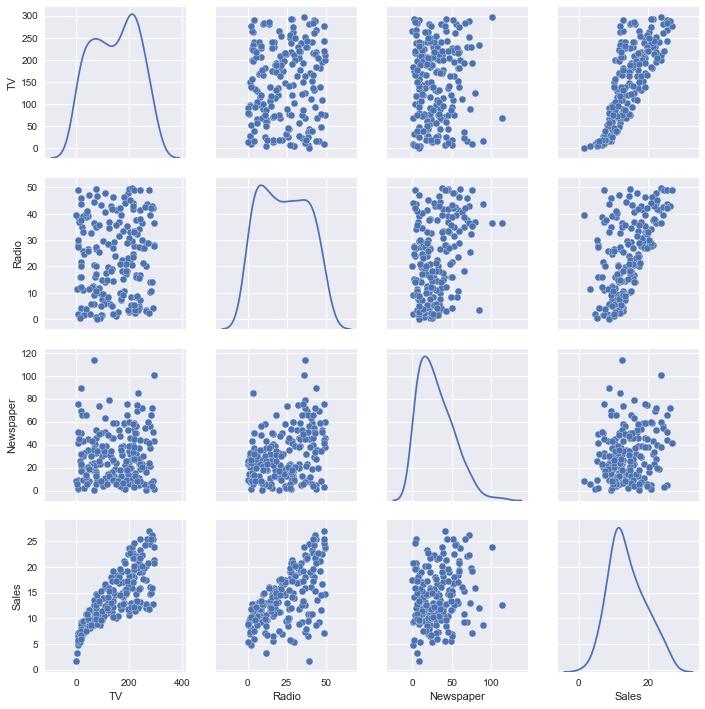

In [95]:
sns.pairplot(A, diag_kind='kde')

In [96]:
A.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [178]:
x1= A[['TV']]

y= A[['Sales']]

b1= A[['TV', 'Radio']]
b2= A[['TV', 'Radio', 'Newspaper']]

In [179]:
m1= LinearRegression()
m2= LinearRegression()
m3= LinearRegression()

### Model1

In [180]:
m1.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
m1.intercept_, m1.coef_[0]

(array([7.03259355]), array([0.04753664]))

sales= beta0 + beta1*TV

for evry one unit increase in Tv leads to 0.04 times of sales increase

In [182]:
m1.score(x1,y)

0.611875050850071

### Model 2

In [183]:
m2.fit(b1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
m2.intercept_, m2.coef_[0]

(array([2.92109991]), array([0.04575482, 0.18799423]))

In [185]:
m2.score(b1,y)

0.8971942610828956

### Model 3

In [186]:
m3.fit(b2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
m3.intercept_, m3.coef_[0]

(array([2.93888937]), array([ 0.04576465,  0.18853002, -0.00103749]))

In [188]:
m3.score(b2, y)

0.8972106381789521

In [189]:
A["Sales"].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [190]:
#To sell 50 cars, how much money should we spend on tv adds?
m4= LinearRegression()
m4.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [191]:
m4.intercept_, m4.coef_[0]

(array([7.03259355]), array([0.04753664]))

In [192]:
m4.score(x1,y)

0.611875050850071

In [193]:
tv= (50-m4.intercept_)/ m4.coef_[0]
tv

array([903.87974538])

In [1]:
a=903*m4.coef_[0]


NameError: name 'm4' is not defined

In [195]:
a+m4.intercept_

array([49.95817986])

In [196]:
#to sell 50 cars the company has to spend 9.03 crores on tv, if they promote only by tv ads

In [197]:
# now if the company wants to spend on both tv and radio to sell 50 cars


In [198]:
sales= 2.92+ 0.046*10+0.1879*100
sales

22.17

In [199]:
sales1= 2.92+ 0.046*100+10
sales1

17.52

In [200]:
sales1= 2.92+ m3.coef_[0,0]*47+m3.coef_[0,1]*239
sales1

50.12961237985459

In [201]:
sales1= 2.92+ 63*m3.coef_[0,0]+m3.coef_[0,1]*250
sales1

52.9356768932412

Using bivariate model tv and radio to achieve 50 cars sales target , it is suggested to invest 47 lakhs on tv and 239 lakhs on radio ad is recommended

### Interaction with countinuous variable

In [202]:
new_col= A["TV"]*A["Radio"]


In [203]:
A["TvRadio"]= new_col

In [204]:
A.head()

,TV,Radio,Newspaper,Sales,TvRadio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [205]:
x=A[["TV", "Radio"]]
y=A[["Sales"]]
x_new=A[["TV", "Radio", "Newspaper"]]

In [206]:
model0=LinearRegression()


In [207]:
model0.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
model0.score(x_new,y)

0.8972106381789521

In [209]:
ypredict= model0.predict(x_new)

In [210]:
rmse= np.sqrt(np.sum((y-ypredict)**2/len(y)))
rmse

Sales    1.66857
dtype: float64

In [211]:
#ols--> ordinary least square
m0=smf.ols("Sales~TV+Radio+Newspaper", A).fit()


This method provides us with the statistical summary where as in sk learn doesnt provide it

In [212]:
m0.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


H0----> Y is independent of X
Ha----> y is dependent on x

as in the case of news paper p>0.05 it fails to reject H0, so that means y doesnt depend on newspaper, so we drop it

Disadvantage of ols is that we have to write the whole equation

In [213]:
m0.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [277]:
y0_predict= (m0.params[0]+ m0.params[1]*A["TV"] + m0.params[2]*A["Radio"] + m0.params[3]*A["Newspaper"])


In [278]:
y0_predict.describe()

count    200.000000
mean      14.022500
std        4.942038
min        3.587258
25%       10.013118
50%       13.945978
75%       17.677945
max       24.786870
dtype: float64

In [219]:
pd.DataFrame(ypredict).describe()

,0
count,200.000000
mean,14.022500
std,4.942038
min,3.587258
25%,10.013118
50%,13.945978
75%,17.677945
max,24.786870


In [226]:
rmse0= np.sqrt(np.sum((A['Sales']-y0_predict)**2/len(y)))

rmse0

1.66857014072257

In [227]:
A.head()

,TV,Radio,Newspaper,Sales,TvRadio
1,230.1,37.8,69.2,22.1,8697.78
2,44.5,39.3,45.1,10.4,1748.85
3,17.2,45.9,69.3,9.3,789.48
4,151.5,41.3,58.5,18.5,6256.95
5,180.8,10.8,58.4,12.9,1952.64


In [228]:
model4= LinearRegression()

In [230]:
XtvRadio=A[["TV", "Radio", "TvRadio"]]

y=A[["Sales"]]


In [231]:
model4.fit(XtvRadio, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
model4.intercept_

array([6.7502202])

In [233]:
model4.coef_

array([[0.01910107, 0.02886034, 0.00108649]])

In [235]:
model4.score(XtvRadio, y)

0.9677905498482523

In [239]:
y2predict= model4.predict(XtvRadio)


In [240]:
rmse2= np.sqrt(np.sum((y-y2predict)**2/len(y)))


In [241]:
rmse2

Sales    0.934033
dtype: float64

In [264]:
#doing this using ols

Y2=smf.ols("Sales~TV+Radio+TvRadio",A).fit()

In [265]:
Y2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TvRadio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [266]:
Y2.params

Intercept    6.750220
TV           0.019101
Radio        0.028860
TvRadio      0.001086
dtype: float64

In [267]:
y2_predict= (Y2.params[0]+ Y2.params[1]*A["TV"] + Y2.params[2]*A["Radio"] + Y2.params[3]*A["TvRadio"])


In [268]:
rmse02= np.sqrt(np.sum((A['Sales']-y2_predict)**2/len(y)))


In [269]:
rmse02

0.9340326081773783

In [271]:
x1= Y2.params[0]+ Y2.params[1]*35 + Y2.params[2]*15 + Y2.params[3]*35*15
x1

8.42207260210527

In [273]:
x2= Y2.params[0]+ Y2.params[1]*15 + Y2.params[2]*35 + Y2.params[3]*35*15
x2

8.617257923482892

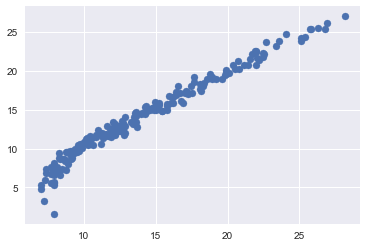

In [275]:
plt.scatter(y2predict,y)

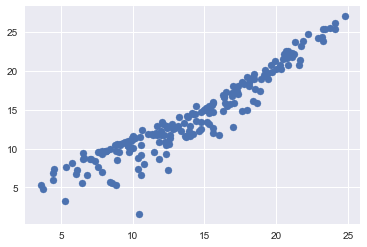

In [280]:
plt.scatter(y0_predict,y)

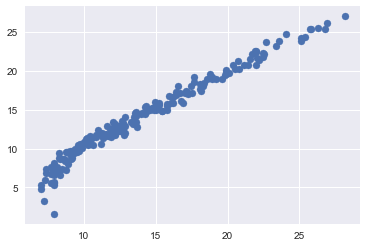

In [284]:
plt.scatter(y2_predict,y)

In [287]:
(y0_predict-np.mean(y0_predict))*(y-np.mean(y))

,Sales,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
